In [2]:
# linear_regression_house_prices.py

# 1) Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib  # for saving the trained model

# 2) Config: paths and basic settings
DATA_PATH = os.path.join("data", "house_price.csv")
OUTPUT_DIR = "outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# 3) Load dataset
print(f"Loading dataset from: {DATA_PATH}")
data = pd.read_csv(DATA_PATH)

# 4) Select features and target
# Features: GrLivArea (sqft), BedroomAbvGr (#bedrooms), FullBath (#full bathrooms)
# Target: SalePrice
FEATURES = ["GrLivArea", "BedroomAbvGr", "FullBath"]
TARGET = "SalePrice"

# Keep only required columns and drop rows with missing values in these columns
df = data[FEATURES + [TARGET]].dropna()

X = df[FEATURES]
y = df[TARGET]

# 5) Quick sanity checks
print("Dataset shape (after selecting features):", df.shape)
print("Feature sample:\n", X.head())
print("Target sample:\n", y.head())

# 6) Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape[0], " | Test size:", X_test.shape[0])

# 7) Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 8) Predictions
y_pred = model.predict(X_test)

# 9) Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n=== Evaluation ===")
print(f"RMSE: {rmse:,.2f}")
print(f"R²:   {r2:.4f}")

# 10) Coefficients insight
coef_df = pd.DataFrame({
    "feature": FEATURES,
    "coefficient": model.coef_
}).sort_values("coefficient", ascending=False)
print("\nModel coefficients:\n", coef_df)

# 11) Visualization: Actual vs Predicted
plt.figure(figsize=(8, 7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="royalblue", s=60, edgecolor="k")
max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", linewidth=2, label="Perfect Prediction")
plt.xlabel("Actual Sale Price (USD)", fontsize=12)
plt.ylabel("Predicted Sale Price (USD)", fontsize=12)
plt.title("Actual vs Predicted House Prices (Linear Regression)", fontsize=14, fontweight="bold")
plt.grid(True, alpha=0.3)
plt.legend()
plot_path = os.path.join(OUTPUT_DIR, "actual_vs_predicted.png")
plt.savefig(plot_path, dpi=120, bbox_inches="tight")
plt.close()
print(f"Saved improved plot: {plot_path}")

# 12) Save model
model_path = os.path.join(OUTPUT_DIR, "linear_regression_model.joblib")
joblib.dump(model, model_path)
print(f"Saved model: {model_path}")

# 13) Save metrics and coefficients to CSV for your portfolio/report
metrics_path = os.path.join(OUTPUT_DIR, "metrics.csv")
pd.DataFrame({"metric": ["RMSE", "R2"], "value": [rmse, r2]}).to_csv(metrics_path, index=False)
print(f"Saved metrics: {metrics_path}")

coef_path = os.path.join(OUTPUT_DIR, "coefficients.csv")
coef_df.to_csv(coef_path, index=False)
print(f"Saved coefficients: {coef_path}")

# 14) Optional: Show a simple residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(7, 5))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.grid(True, alpha=0.3)
residuals_path = os.path.join(OUTPUT_DIR, "residuals.png")
plt.savefig(residuals_path, dpi=120, bbox_inches="tight")
plt.close()
print(f"Saved residuals plot: {residuals_path}")

print("\nDone. Outputs are in the 'outputs' folder.")

Loading dataset from: data\house_price.csv
Dataset shape (after selecting features): (1460, 4)
Feature sample:
    GrLivArea  BedroomAbvGr  FullBath
0       1710             3         2
1       1262             3         2
2       1786             3         2
3       1717             3         1
4       2198             4         2
Target sample:
 0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64
Train size: 1168  | Test size: 292

=== Evaluation ===
RMSE: 52,975.72
R²:   0.6341

Model coefficients:
         feature   coefficient
2      FullBath  30014.324109
0     GrLivArea    104.026307
1  BedroomAbvGr -26655.165357
Saved improved plot: outputs\actual_vs_predicted.png
Saved model: outputs\linear_regression_model.joblib
Saved metrics: outputs\metrics.csv
Saved coefficients: outputs\coefficients.csv
Saved residuals plot: outputs\residuals.png

Done. Outputs are in the 'outputs' folder.


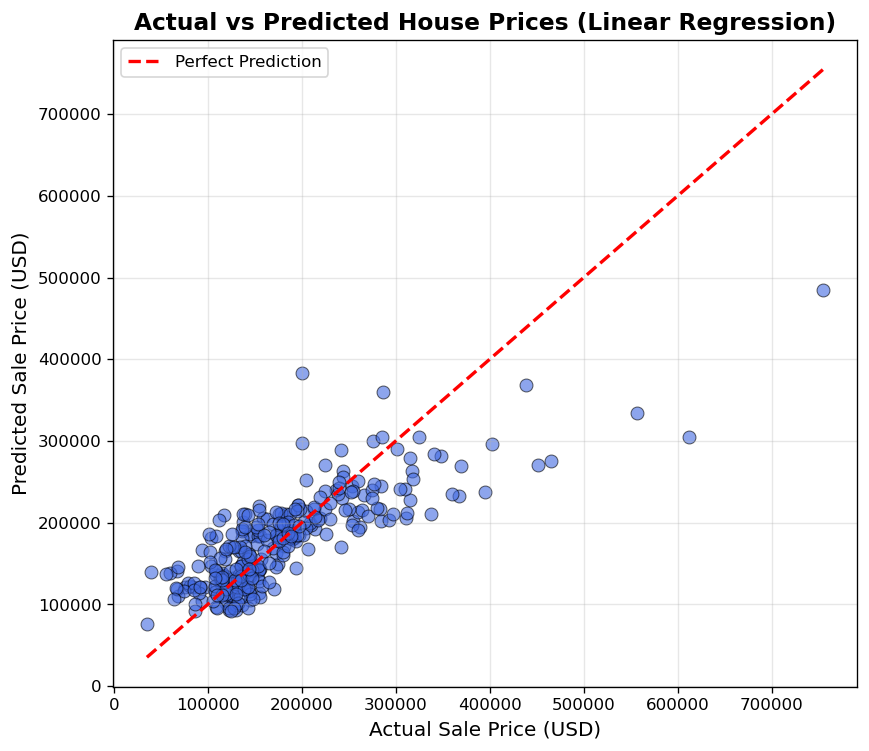

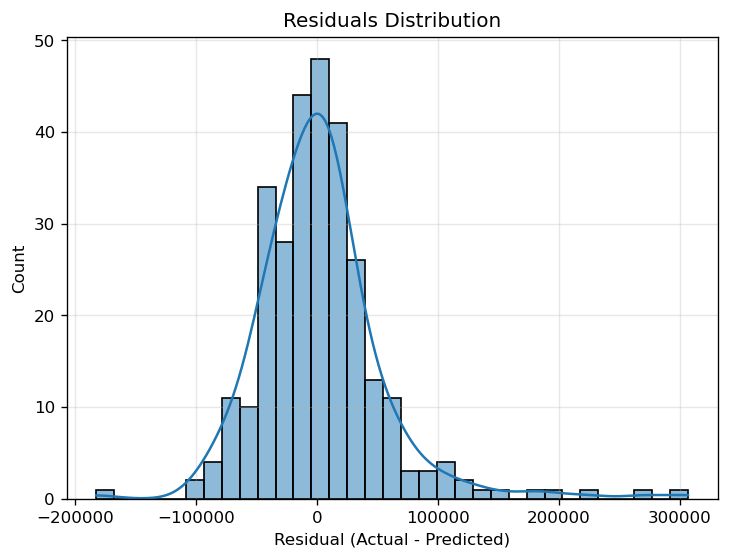

In [3]:
from IPython.display import Image, display

# Show actual vs predicted graph
display(Image(filename="outputs/actual_vs_predicted.png"))

# Show residuals graph
display(Image(filename="outputs/residuals.png"))

## 📌 Problem Statement

Predict the sale price of houses based on key features like living area, number of bedrooms, and bathrooms.  
This model is built for internship portfolio purposes and aims to demonstrate regression modeling, evaluation, and visualization.

## 📊 Dataset Overview

- **Source:** Kaggle (train.csv)
- **Total Samples:** 1460
- **Selected Features:**
  - `GrLivArea` – Above-ground living area (sqft)
  - `BedroomAbvGr` – Number of bedrooms above ground
  - `FullBath` – Number of full bathrooms
- **Target Variable:** `SalePrice` (in USD)

## 🧮 Model Summary

- **Model Used:** Linear Regression
- **Train/Test Split:** 80/20 → 1168 training samples, 292 test samples
- **Intercept:** 94,203.09
- **Coefficients:**
  - `FullBath`: +30,014.32
  - `GrLivArea`: +104.03
  - `BedroomAbvGr`: −26,655.17

### 📈 Evaluation Metrics
- **RMSE:** $52,975.72  
- **R² Score:** 0.6341

## 📈 Graphs

### 🔹 Actual vs Predicted Prices

This scatter plot compares predicted house prices with actual sale prices.  
The red dashed line represents perfect prediction. Most points are clustered near the line, indicating decent model accuracy.

---

### 🔹 Residuals Distribution

This histogram shows the distribution of residuals (prediction errors).  
The curve is roughly centered around zero, suggesting that the model does not have strong bias and errors are symmetrically distributed.

## 💡 Insights

- The model captures general pricing trends well, especially with `GrLivArea` and `FullBath`.
- Negative coefficient for `BedroomAbvGr` may indicate multicollinearity or quality-related factors.
- RMSE of ~$53K is acceptable for a basic model, but further improvements can be made by adding more features or using regularization techniques.

In [14]:
import pandas as pd

dataset = pd.read_csv("data/house_price.csv")

In [15]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
dataset.shape

(1460, 81)